In [1]:
import numpy as np
import os
import time
import scipy
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.ticker as mtick
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



from bandit import ExponentialSimulationDistribution, RandomPolicy, SymmetricSimulationDistribution


# Simulation Distribution 

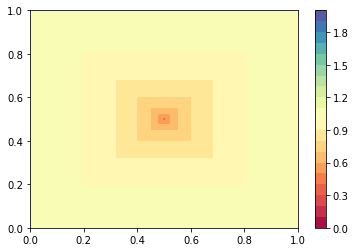

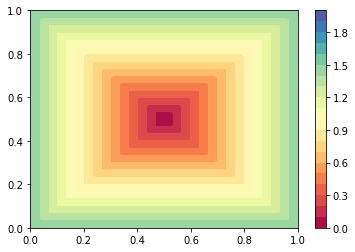

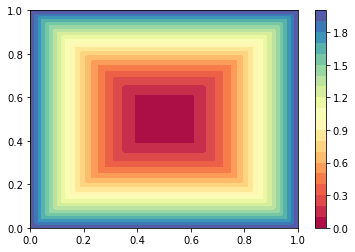

In [2]:
n_source_list = [100000, 100000, 100000]
n_target = 100000
K = 3
dim = 2
gamma_list = [0.2, 1, 2]
distribution = ExponentialSimulationDistribution(K, dim, gamma_list)

axis0,axis1 = np.meshgrid(np.arange(0,1.01,0.01),np.arange(0,1.01,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y = distribution.density_X_source(X = X_grid, distribution_idx = 0)
y = y.reshape(-1,axis1.shape[0])
cfplot = plt.contourf(axis0, axis1, y ,cmap = plt.cm.Spectral, levels = [0.1 * i  for i in range(21)])
cbar = plt.colorbar(cfplot)
plt.savefig("./figures/marginal_distribution_1.pdf",bbox_inches="tight")
plt.show()

axis0,axis1 = np.meshgrid(np.arange(0,1.01,0.01),np.arange(0,1.01,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y = distribution.density_X_source(X = X_grid, distribution_idx = 1)
y = y.reshape(-1,axis1.shape[0])
cfplot = plt.contourf(axis0, axis1, y ,cmap = plt.cm.Spectral, levels = [0.1 * i  for i in range(21)])
cbar = plt.colorbar(cfplot)
plt.savefig("./figures/marginal_distribution_2.pdf",bbox_inches="tight")
plt.show()

axis0,axis1 = np.meshgrid(np.arange(0,1.01,0.01),np.arange(0,1.01,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y = distribution.density_X_source(X = X_grid, distribution_idx = 2)
y = y.reshape(-1,axis1.shape[0])
cfplot = plt.contourf(axis0, axis1, y ,cmap = plt.cm.Spectral, levels = [0.1 * i  for i in range(21)])
cbar = plt.colorbar(cfplot)
plt.savefig("./figures/marginal_distribution_3.pdf",bbox_inches="tight")
plt.show()


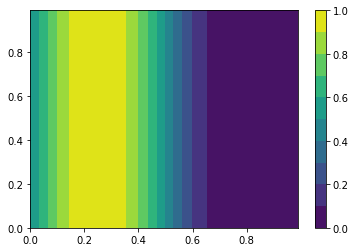

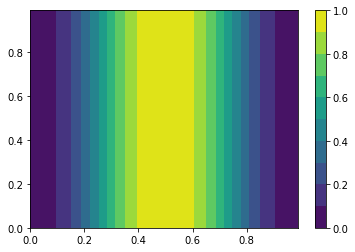

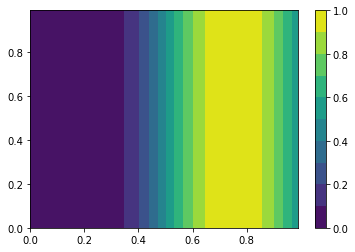

In [ ]:
n_source_list = [100000, 100000, 100000]
n_target = 100000
K = 3
dim = 2
gamma_list = [0.2, 1, 2]
distribution = ExponentialSimulationDistribution(K, dim, gamma_list)

axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y, _ = distribution.reward_function(X = X_grid, arms = np.repeat(0, X_grid.shape[0]))
y = y.reshape(-1,axis1.shape[0])
cfplot = plt.contourf(axis0, axis1, y , levels = [0.1 * i  for i in range(11)])
cbar = plt.colorbar(cfplot)
plt.savefig("./figures/reward_function_1.pdf",bbox_inches="tight")
plt.show()


axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y, _ = distribution.reward_function(X = X_grid, arms = np.repeat(1, X_grid.shape[0]))
y = y.reshape(-1,axis1.shape[0])
cfplot = plt.contourf(axis0, axis1, y , levels = [0.1 * i  for i in range(11)])
cbar = plt.colorbar(cfplot)
plt.savefig("./figures/reward_function_2.pdf",bbox_inches="tight")
plt.show()

axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y, _ = distribution.reward_function(X = X_grid, arms = np.repeat(2, X_grid.shape[0]))
y = y.reshape(-1,axis1.shape[0])
cfplot = plt.contourf(axis0, axis1, y , levels = [0.1 * i  for i in range(11)])
cbar = plt.colorbar(cfplot)
plt.savefig("./figures/reward_function_3.pdf",bbox_inches="tight")
plt.show()



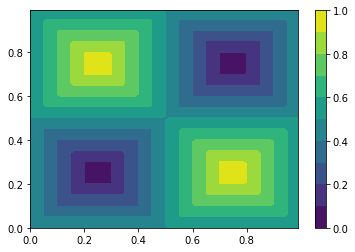

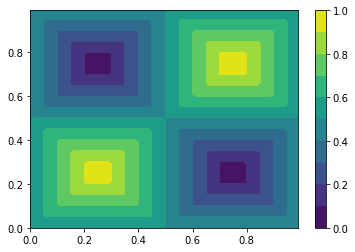

In [2]:
n_source_list = [100000, 100000, 100000]
n_target = 100000
K = 2
dim = 2
gamma_list = [0.2, 1, 2]
distribution = SymmetricSimulationDistribution(K, dim, gamma_list)

axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y, _ = distribution.reward_function(X = X_grid, arms = np.repeat(0, X_grid.shape[0]))
y = y.reshape(-1,axis1.shape[0])
cfplot = plt.contourf(axis0, axis1, y , levels = [0.1 * i  for i in range(11)])
cbar = plt.colorbar(cfplot)
plt.savefig("./figures/reward_function_symmetric_1.pdf",bbox_inches="tight")
plt.show()


axis0,axis1 = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
X_grid = np.array([axis0.ravel(),axis1.ravel()]).T
y, _ = distribution.reward_function(X = X_grid, arms = np.repeat(1, X_grid.shape[0]))
y = y.reshape(-1,axis1.shape[0])
cfplot = plt.contourf(axis0, axis1, y , levels = [0.1 * i  for i in range(11)])
cbar = plt.colorbar(cfplot)
plt.savefig("./figures/reward_function_symmetric_2.pdf",bbox_inches="tight")
plt.show()



# effective sample size for np

In [14]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/sample_size_target" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1, 2,4,8,1024],
    "epsilon_m": [ 1024, 8, 4, 2],
    "gamma": [0],
    "distribution": ["exponential"],
    "n": [ 10000, 20000, 40000, 60000, 80000, 120000, 160000],
    "n_m": [0], 
    "K": [3],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 97.5)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 2.5)).reset_index()


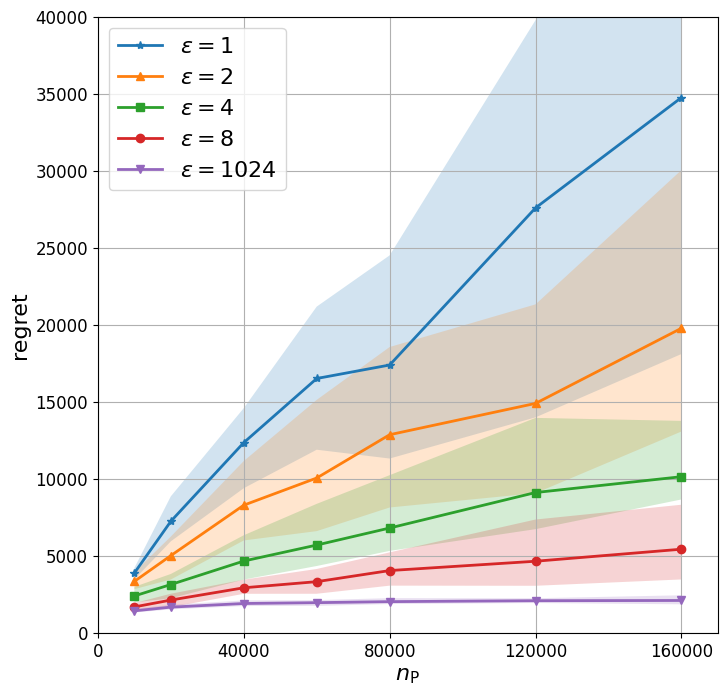

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
x = best_mean_log["n"].unique()
x.sort()


n_m = 0
epsilon_m = 1024


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1$',marker = "*")
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 2) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=2$',marker = "^")
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 4) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=4$',marker = "s")
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 8) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=8$',marker = "o")
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)

idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1024) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1024$',marker = "v")
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


_ = plt.xlim(0, 170000)
_ = plt.ylim(0, 40000)
# font size
_ = plt.xlabel(r"$n_{\mathrm{P}}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.xticks([0, 40000, 80000, 120000, 160000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_target.pdf",bbox_inches="tight")

In [16]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/sample_size_target" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1, 2,4,8,1024],
    "epsilon_m": [ 1024, 8, 4, 2],
    "gamma": [0],
    "distribution": ["symmetric"],
    "n": [ 10000, 20000, 40000, 60000, 80000, 120000, 160000],
    "n_m": [0], 
    "K": [2],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 97.5)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 2.5)).reset_index()


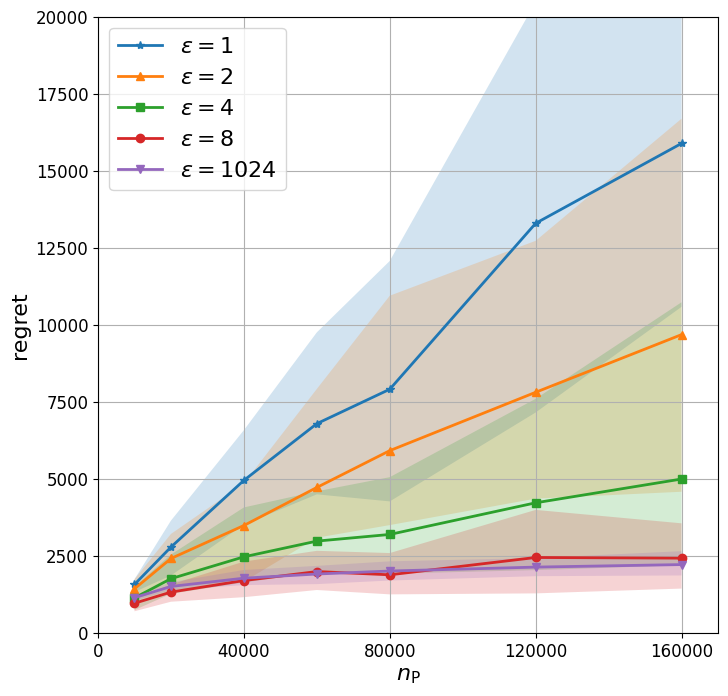

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
x = best_mean_log["n"].unique()
x.sort()


n_m = 0
epsilon_m = 1024


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 2) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=2$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 4) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=4$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 8) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=8$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1024) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1024$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


_ = plt.xlim(0, 170000)
_ = plt.ylim(0, 20000)
# font size
_ = plt.xlabel(r"$n_{\mathrm{P}}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.xticks([0, 40000, 80000, 120000, 160000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_target_symmetric.pdf",bbox_inches="tight")

In [18]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/sample_size_target" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1, 2,4,8,1024],
    "epsilon_m": [ 1024, 8, 4, 2],
    "gamma": [0],
    "distribution": ["exponential"],
    "n": [ 10000, 20000, 40000, 60000, 80000, 120000, 160000],
    "n_m": [5000], 
    "K": [3],
    "M": [1],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 97.5)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 2.5)).reset_index()


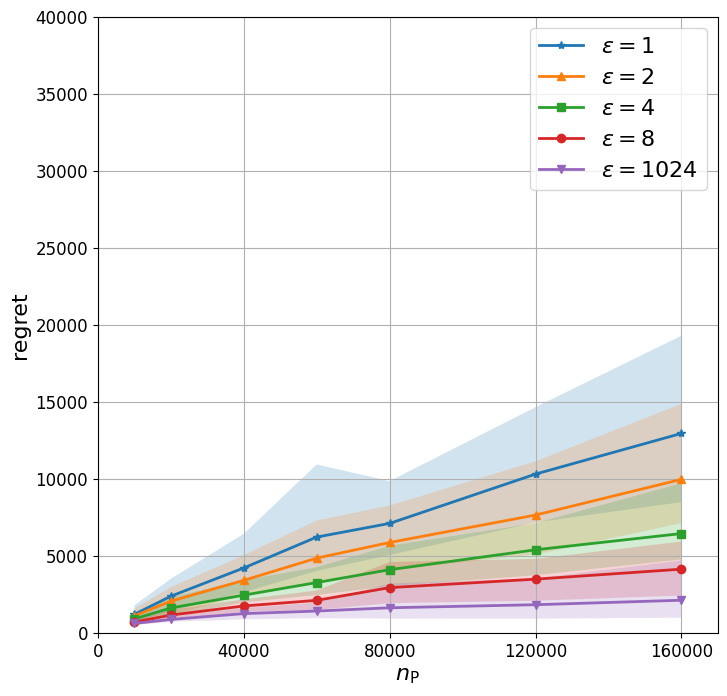

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
x = best_mean_log["n"].unique()
x.sort()


n_m = 5000
epsilon_m = 8


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 2) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=2$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)




idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 4) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=4$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 8) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=8$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1024) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1024$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(0, 170000)
_ = plt.ylim(0, 40000)
# font size
_ = plt.xlabel(r"$n_{\mathrm{P}}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.xticks([0, 40000, 80000, 120000, 160000,], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_target_with_source.pdf",bbox_inches="tight")

In [21]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/sample_size_target" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1, 2,4,8,1024],
    "epsilon_m": [ 1024, 8, 4, 2],
    "gamma": [0],
    "distribution": ["symmetric"],
    "n": [ 10000, 20000, 40000, 60000, 80000, 120000, 160000],
    "n_m": [5000], 
    "K": [2],
    "M": [1],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 97.5)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 2.5)).reset_index()


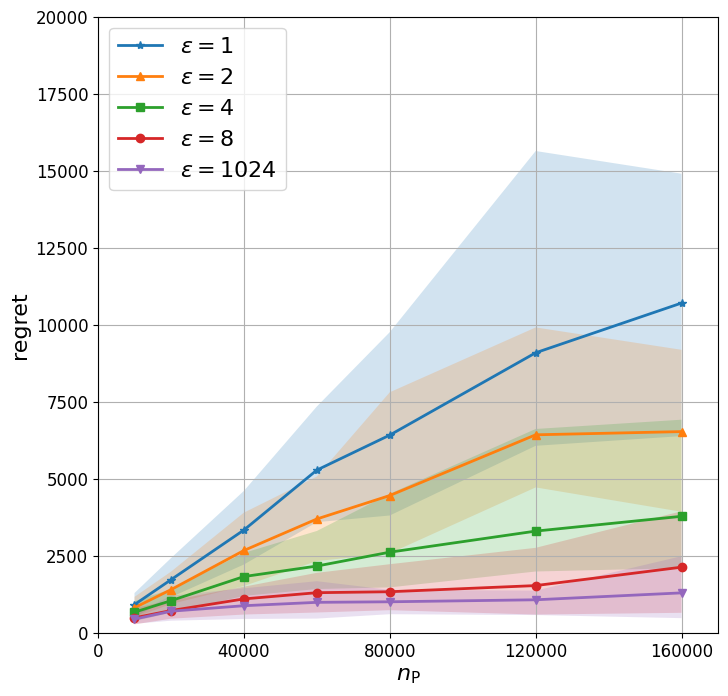

In [22]:
fig, ax = plt.subplots(figsize=(8,8))
x = best_mean_log["n"].unique()
x.sort()


n_m = 5000
epsilon_m = 8


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 2) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=2$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)




idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 4) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=4$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 8) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=8$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1024) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1024$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(0, 170000)
_ = plt.ylim(0, 20000)
# font size
_ = plt.xlabel(r"$n_{\mathrm{P}}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.xticks([0, 40000, 80000, 120000, 160000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_target_symmetric_with_source.pdf",bbox_inches="tight")

In [23]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/sample_size_target" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1, 2,4,8,1024],
    "epsilon_m": [ 1024, 8, 4, 2],
    "gamma": [0],
    "distribution": ["exponential"],
    "n": [ 10000, 20000, 40000, 60000, 80000, 120000, 160000],
    "n_m": [5000], 
    "K": [3],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 97.5)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 2.5)).reset_index()


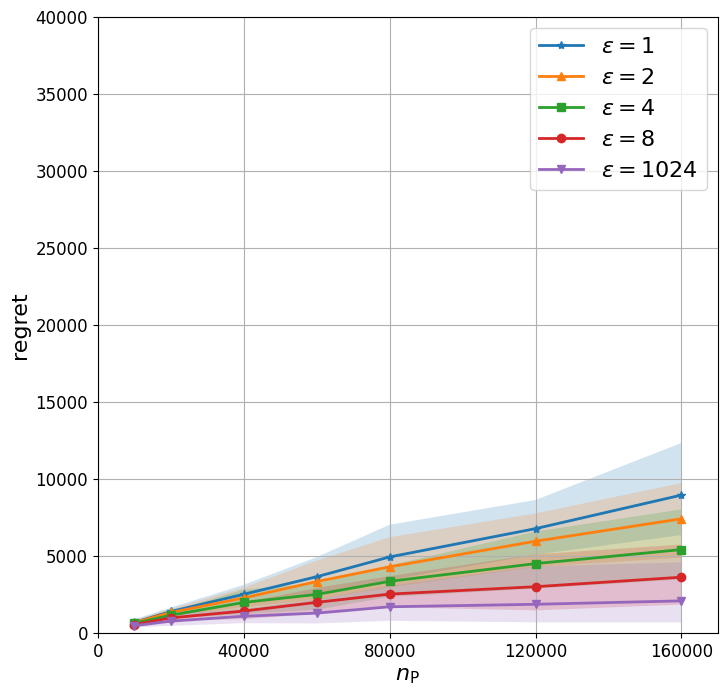

In [24]:
fig, ax = plt.subplots(figsize=(8,8))
x = best_mean_log["n"].unique()
x.sort()


n_m = 5000
epsilon_m = 8


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 2) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=2$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)




idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 4) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=4$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 8) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=8$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1024) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1024$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(0, 170000)
_ = plt.ylim(0, 40000)
# font size
_ = plt.xlabel(r"$n_{\mathrm{P}}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.xticks([0, 40000, 80000, 120000, 160000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_target_with_source_strong.pdf",bbox_inches="tight")

In [55]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/sample_size_target" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1, 2,4,8,1024],
    "epsilon_m": [ 1024, 8, 4, 2],
    "gamma": [0],
    "distribution": ["symmetric"],
    "n": [ 10000, 20000, 40000, 60000, 80000, 120000, 160000, 240000],
    "n_m": [5000], 
    "K": [2],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 97.5)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 2.5)).reset_index()


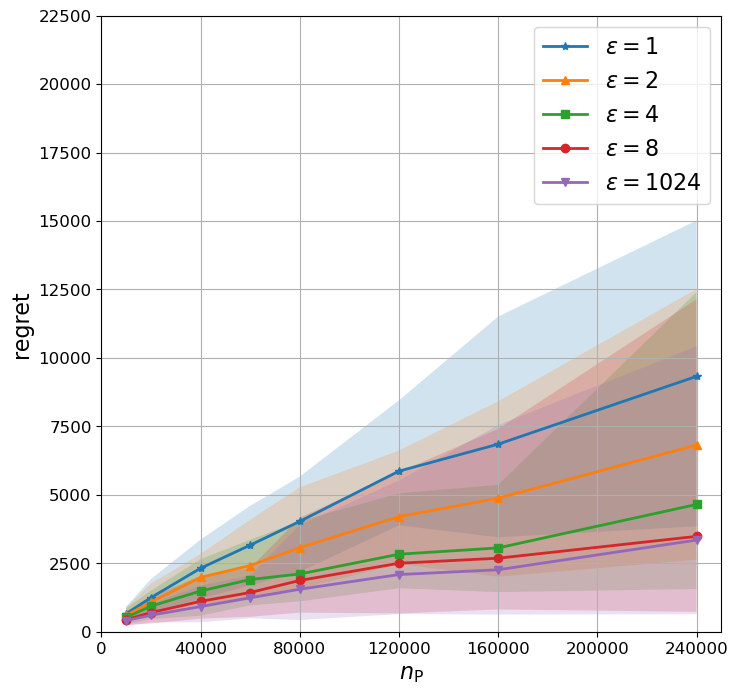

In [56]:
fig, ax = plt.subplots(figsize=(8,8))
x = best_mean_log["n"].unique()
x.sort()


n_m = 5000
epsilon_m = 4


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 2) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=2$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)




idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 4) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=4$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 8) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=8$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx = (best_mean_log["n_m"] == n_m) & (best_mean_log["epsilon"] == 1024) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\varepsilon=1024$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(0, 250000)
_ = plt.ylim(0, 22500)
# font size
_ = plt.xlabel(r"$n_{\mathrm{P}}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.xticks([0, 40000, 80000, 120000, 160000, 200000, 240000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_target_symmetric_with_source.pdf",bbox_inches="tight")

# effective sample size for nq

In [58]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/sample_size_source" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1],
    "epsilon_m": [ 2, 4, 8, 1024],
    "gamma": [0, 0.2, 1, 2],
    "distribution": ["exponential"],
    "n": [  80000],
    "n_m": [0, 10000, 20000, 50000, 100000], 
    "K": [3],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 97.5)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 2.5)).reset_index()



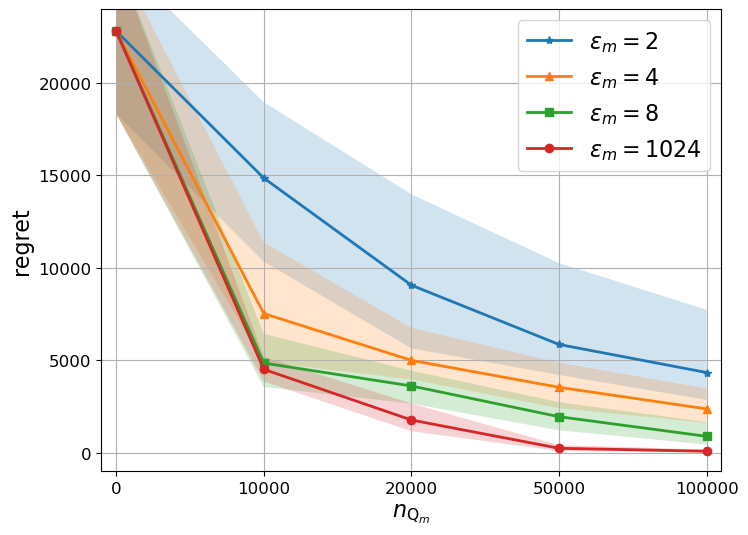

In [59]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 0
epsilon = 1


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(-1000, 24000)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)

_ = plt.savefig("./figures/sample_size_source_{}_{}.pdf".format(gamma,epsilon),bbox_inches="tight")


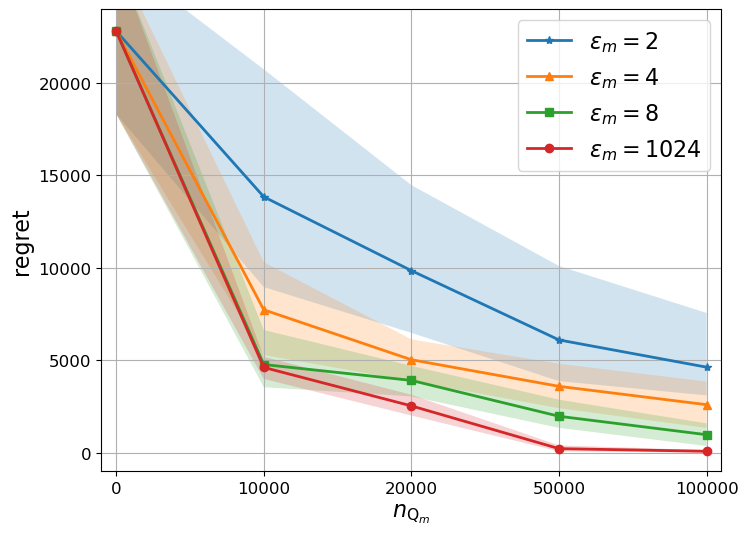

In [60]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 0.2
epsilon = 1


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(-1000, 24000)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_source_{}_{}.pdf".format(gamma,epsilon),bbox_inches="tight")


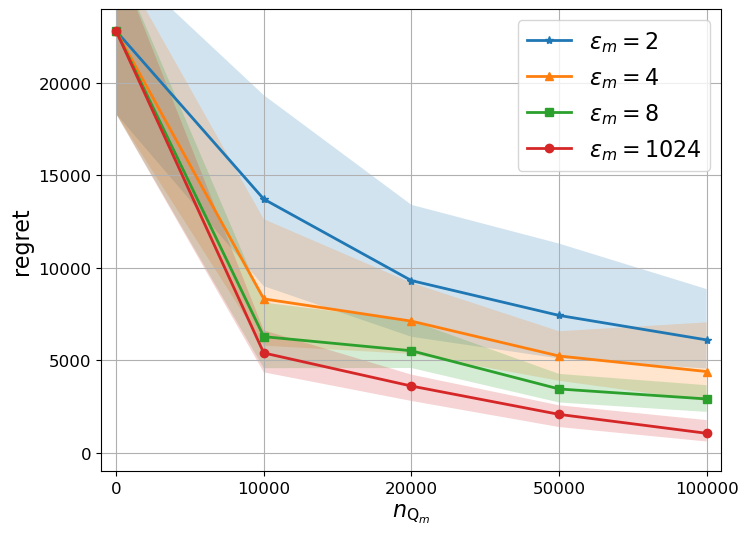

In [61]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 2
epsilon = 1


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(-1000, 24000)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_source_{}_{}.pdf".format(gamma,epsilon),bbox_inches="tight")

In [62]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/sample_size_source" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1],
    "epsilon_m": [ 2, 4, 8, 1024],
    "gamma": [0, 0.2, 1, 2],
    "distribution": ["symmetric"],
    "n": [  80000],
    "n_m": [0, 10000, 20000, 50000, 100000], 
    "K": [2],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 97.5)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 2.5)).reset_index()



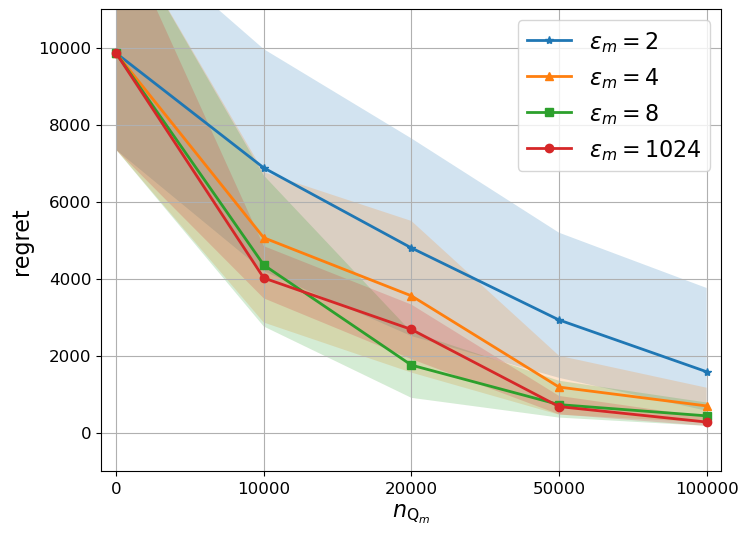

In [63]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 0
epsilon = 1


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(-1000, 11000)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)

_ = plt.savefig("./figures/sample_size_source_{}_{}_symmetric.pdf".format(gamma,epsilon),bbox_inches="tight")


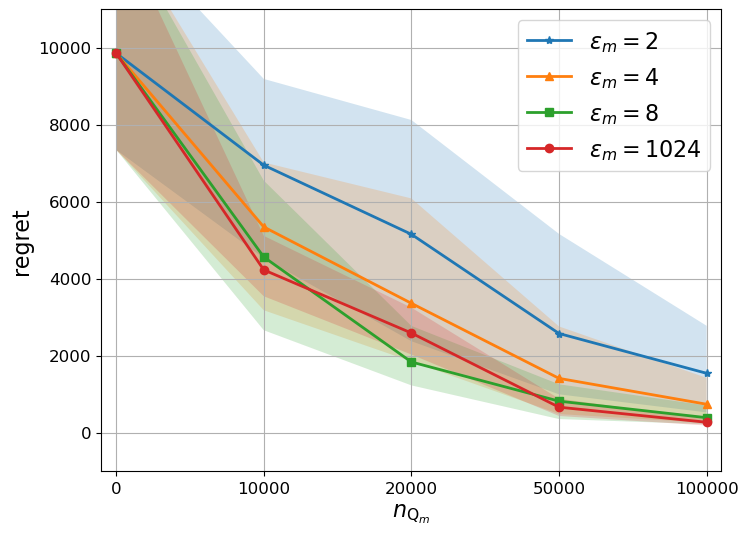

In [64]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 0.2
epsilon = 1


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(-1000, 11000)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_source_{}_{}_symmetric.pdf".format(gamma,epsilon),bbox_inches="tight")


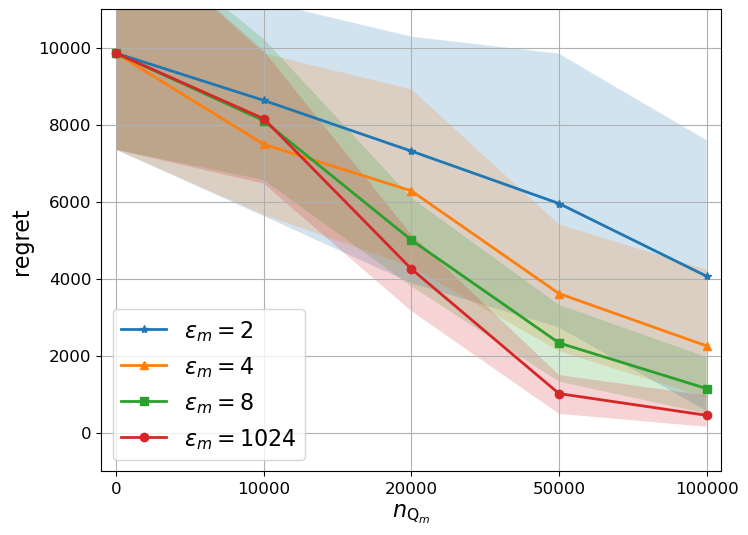

In [65]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 2
epsilon = 1


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(-1000, 11000)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_source_{}_{}_symmetric.pdf".format(gamma,epsilon),bbox_inches="tight")

In [66]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/sample_size_source" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [2],
    "epsilon_m": [ 2, 4, 8, 1024],
    "gamma": [0, 0.2, 1, 2],
    "distribution": ["exponential"],
    "n": [  80000],
    "n_m": [0, 10000, 20000, 50000, 100000], 
    "K": [3],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 97.5)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 2.5)).reset_index()



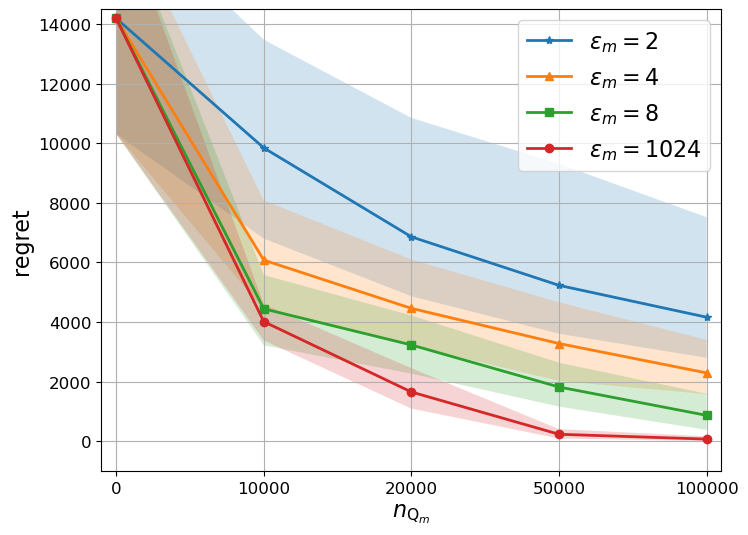

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 0
epsilon = 2


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(-1000, 14500)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_source_{}_{}.pdf".format(gamma,epsilon),bbox_inches="tight")


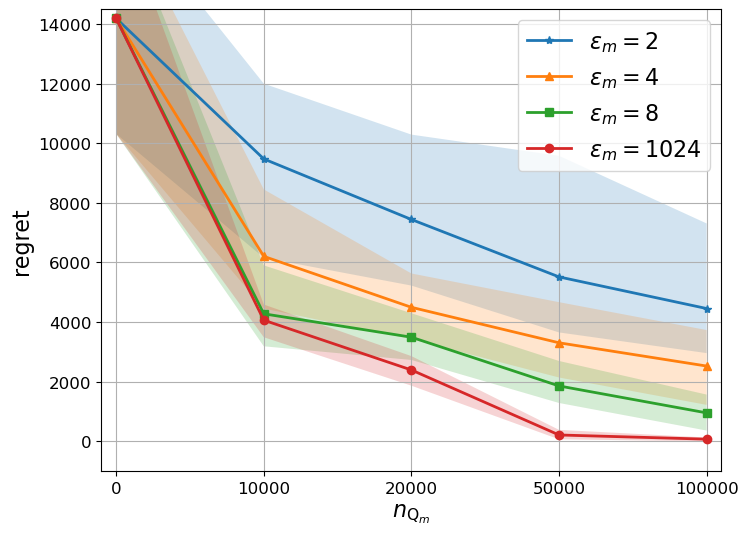

In [68]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 0.2
epsilon = 2


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(-1000, 14500)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_source_{}_{}.pdf".format(gamma,epsilon),bbox_inches="tight")

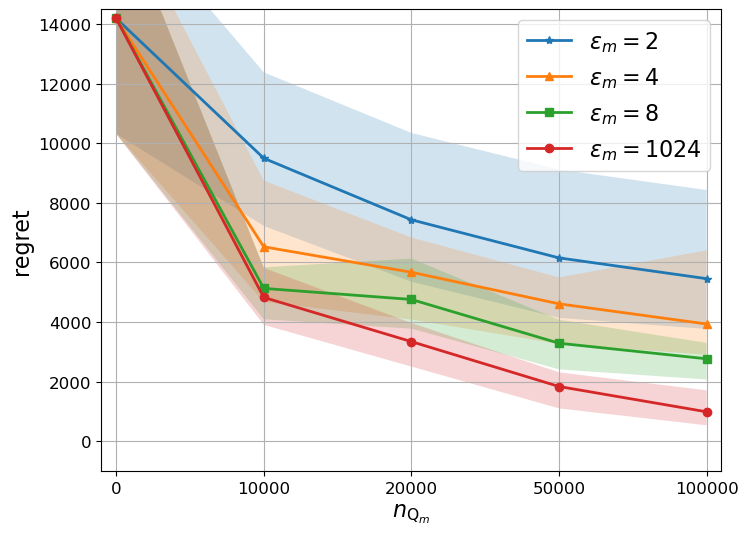

In [69]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 2
epsilon = 2


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(-1000, 14500)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_source_{}_{}.pdf".format(gamma,epsilon),bbox_inches="tight")

In [70]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/sample_size_source" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [2],
    "epsilon_m": [ 2, 4, 8, 1024],
    "gamma": [0, 0.2, 1, 2],
    "distribution": ["symmetric"],
    "n": [  80000],
    "n_m": [0, 10000, 20000, 50000, 100000], 
    "K": [2],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 97.5)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 2.5)).reset_index()



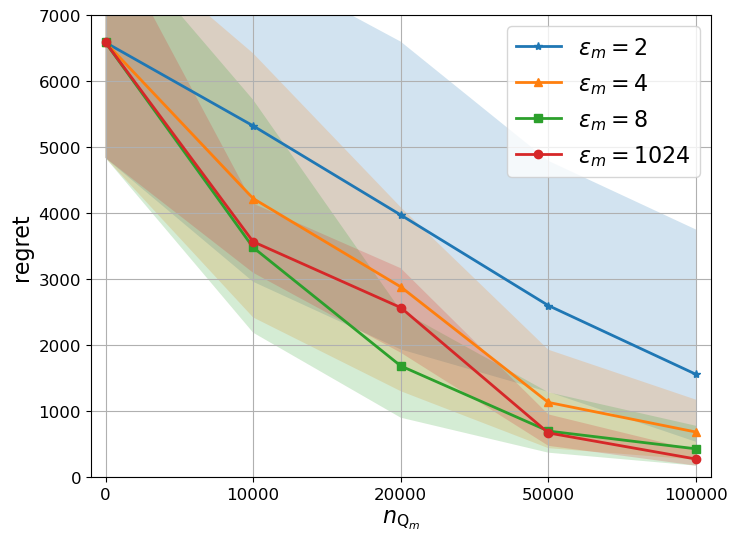

In [71]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 0
epsilon = 2


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(0, 7000)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_source_{}_{}_symmetric.pdf".format(gamma,epsilon),bbox_inches="tight")


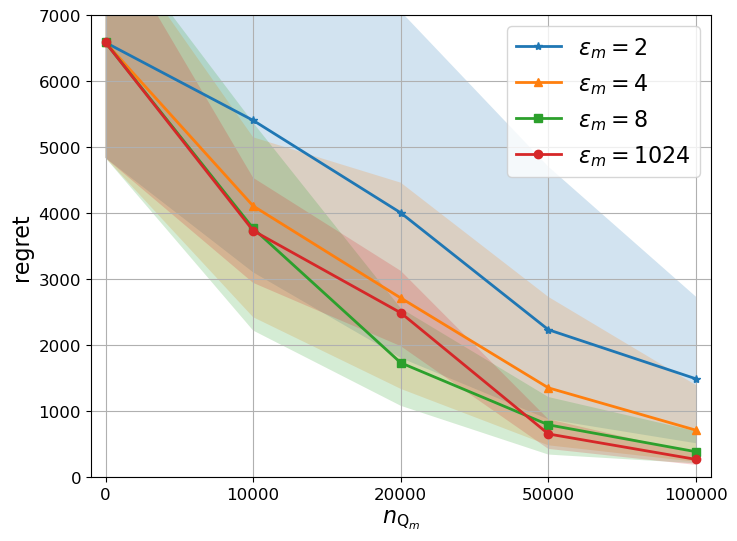

In [72]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 0.2
epsilon = 2


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(0, 7000)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_source_{}_{}_symmetric_symmetric.pdf".format(gamma,epsilon),bbox_inches="tight")

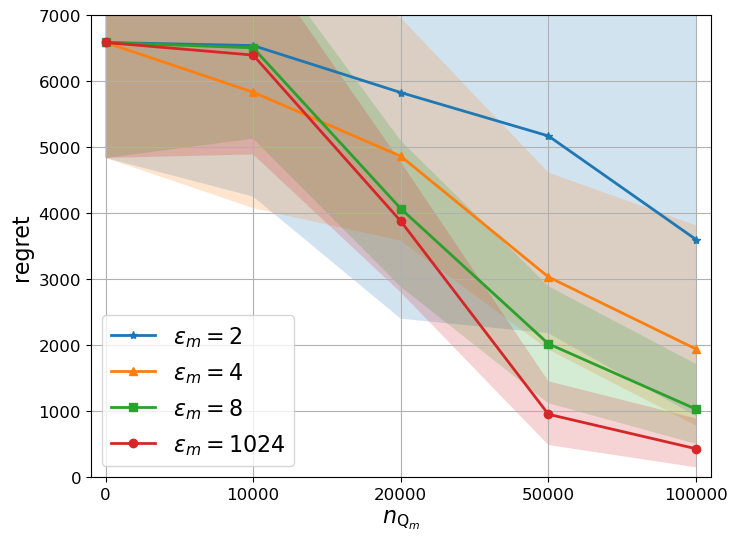

In [73]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4])

gamma = 2
epsilon = 2


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 2) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]   
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=2$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 4) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=4$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 8) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx] 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=8$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["epsilon"] == epsilon) & (best_mean_log["epsilon_m"] == 1024) & (best_mean_log["gamma"] == gamma)
y = best_mean_log['regret'][idx]  
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon_m=1024$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_down = quantile_down_log['regret'][idx]
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 4.1)
_ = plt.ylim(0, 7000)
_ = plt.xticks(x, [0, 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/sample_size_source_{}_{}_symmetric_symmetric.pdf".format(gamma,epsilon),bbox_inches="tight")

## kappa

In [113]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/kappa" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,kappa,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [2],
    "epsilon_m": [ 1024, 8, 4, 2, 1],
    "gamma": [0.2],
    "distribution": ["exponential"],
    "n": [  40000],
    "n_m": [0, 10000, 20000, 50000, 100000], 
    "K": [3],
    "M": [2],
    "kappa": [0, 0.2, 0.4, 0.6, 0.8, 1],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "kappa", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "kappa", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 90)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "kappa", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 10)).reset_index()



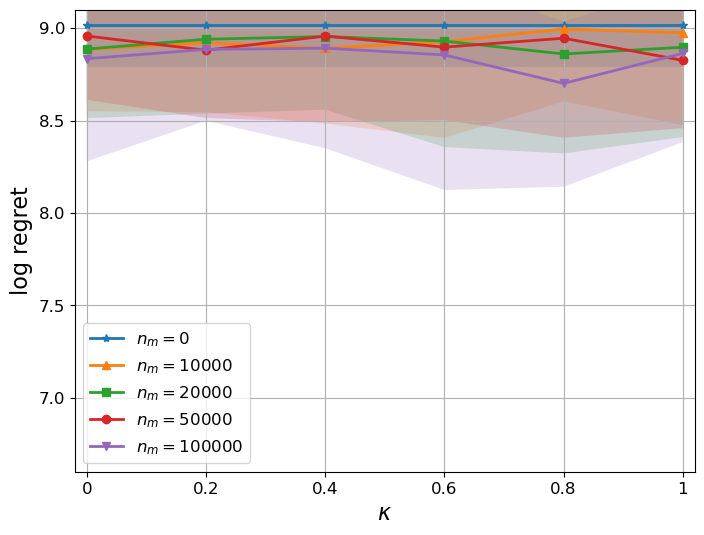

In [114]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5])


epsilon_m = 1


idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(6.6, 9.1)
_ = plt.xticks(x, [0, 0.2,0.4,0.6,0.8,1], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\kappa$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 12, loc =3)
_ = plt.savefig("./figures/kappa_{}.pdf".format(epsilon_m),bbox_inches="tight")


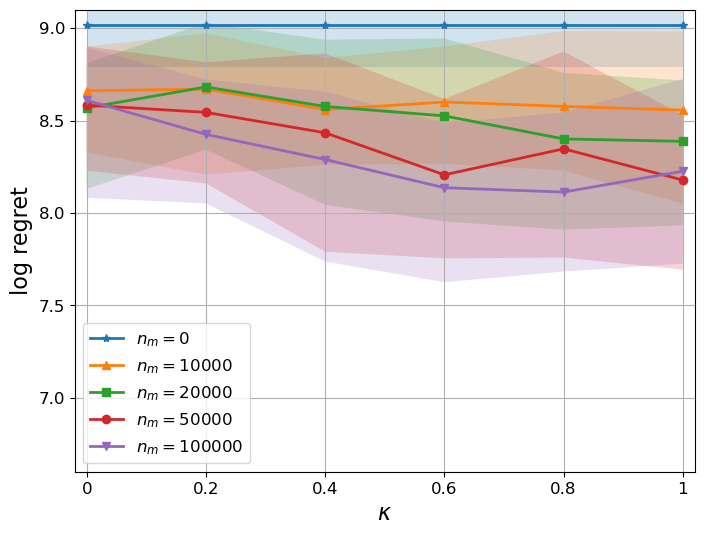

In [115]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5])


epsilon_m = 2


idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(6.6, 9.1)
_ = plt.xticks(x, [0, 0.2,0.4,0.6,0.8,1], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\kappa$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 12, loc =3)
_ = plt.savefig("./figures/kappa_{}.pdf".format(epsilon_m),bbox_inches="tight")


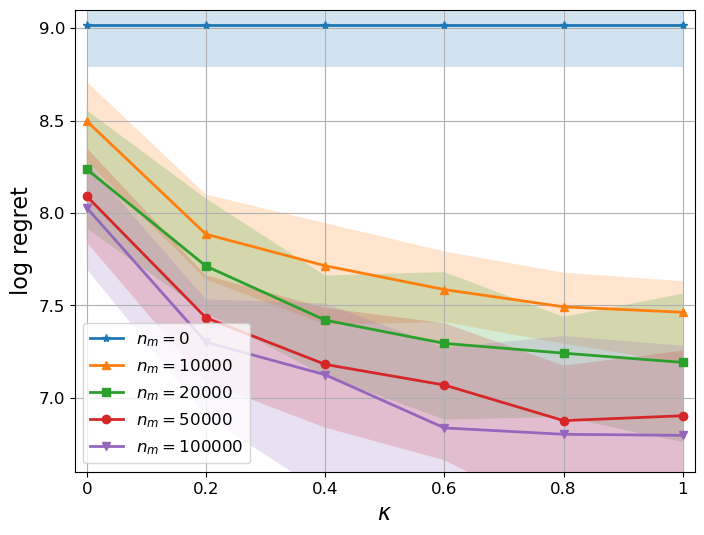

In [116]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5])


epsilon_m = 8


idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(6.6, 9.1)
_ = plt.xticks(x, [0, 0.2,0.4,0.6,0.8,1], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\kappa$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 12, loc =3)
_ = plt.savefig("./figures/kappa_{}.pdf".format(epsilon_m),bbox_inches="tight")


In [117]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/kappa" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,kappa,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [2],
    "epsilon_m": [ 1024, 8, 4, 2, 1],
    "gamma": [0.2],
    "distribution": ["symmetric"],
    "n": [  40000],
    "n_m": [0, 10000, 20000, 50000, 100000], 
    "K": [2],
    "M": [2],
    "kappa": [0, 0.2, 0.4, 0.6, 0.8, 1],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "kappa", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "kappa", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 90)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "kappa", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 10)).reset_index()



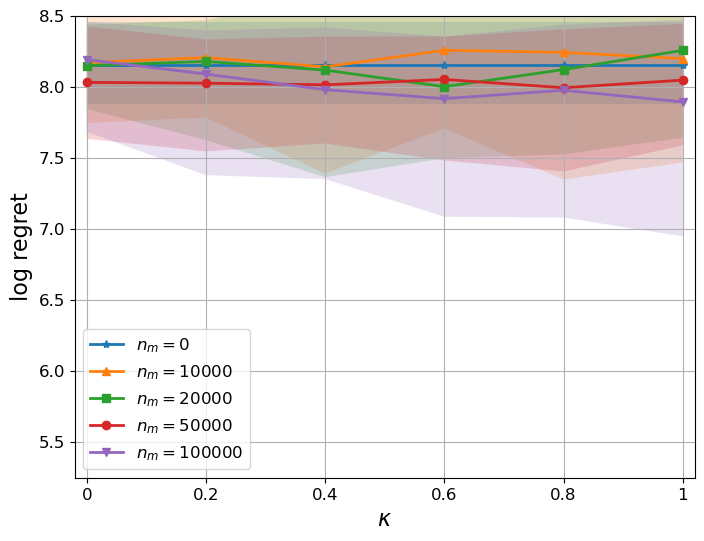

In [118]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5])


epsilon_m = 1


idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(5.25, 8.5)
_ = plt.xticks(x, [0, 0.2,0.4,0.6,0.8,1], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\kappa$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 12, loc =3)
_ = plt.savefig("./figures/kappa_{}_symmetric.pdf".format(epsilon_m),bbox_inches="tight")


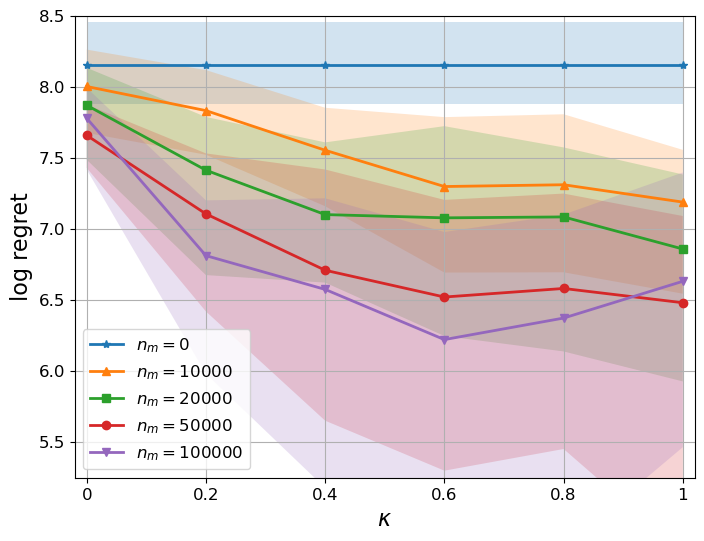

In [119]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5])


epsilon_m = 4


idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(5.25, 8.5)
_ = plt.xticks(x, [0, 0.2,0.4,0.6,0.8,1], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\kappa$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 12, loc =3)
_ = plt.savefig("./figures/kappa_{}_symmetric.pdf".format(epsilon_m),bbox_inches="tight")


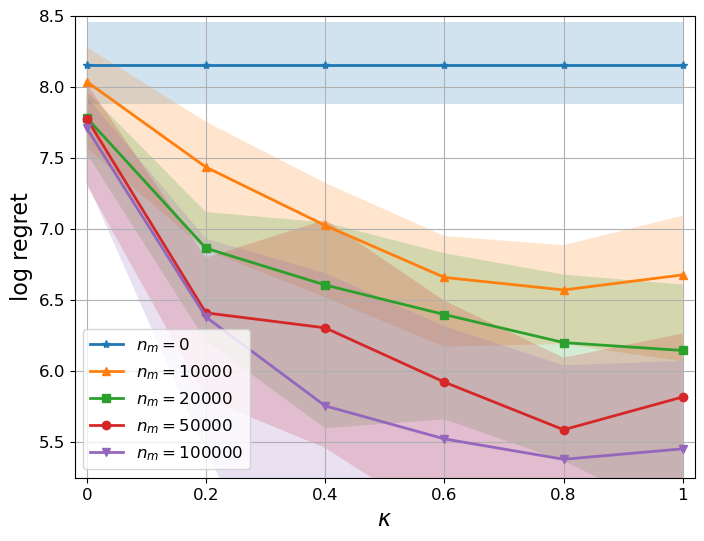

In [120]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5])


epsilon_m = 8


idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



_ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(5.25, 8.5)
_ = plt.xticks(x, [0, 0.2,0.4,0.6,0.8,1], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\kappa$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 12, loc =3)
_ = plt.savefig("./figures/kappa_{}_symmetric.pdf".format(epsilon_m),bbox_inches="tight")


## Gamma

In [121]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/gamma" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,kappa,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [2],
    "epsilon_m": [ 1, 2, 4, 8 , 1024],
    "gamma": [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0],
    "distribution": ["exponential"],
    "n": [  40000],
    "n_m": [0, 10000, 20000, 50000, 100000], 
    "K": [3],
    "M": [2],
    "kappa": [0, 0.2, 0.4, 0.6, 0.8, 1],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "kappa", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 90)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 10)).reset_index()



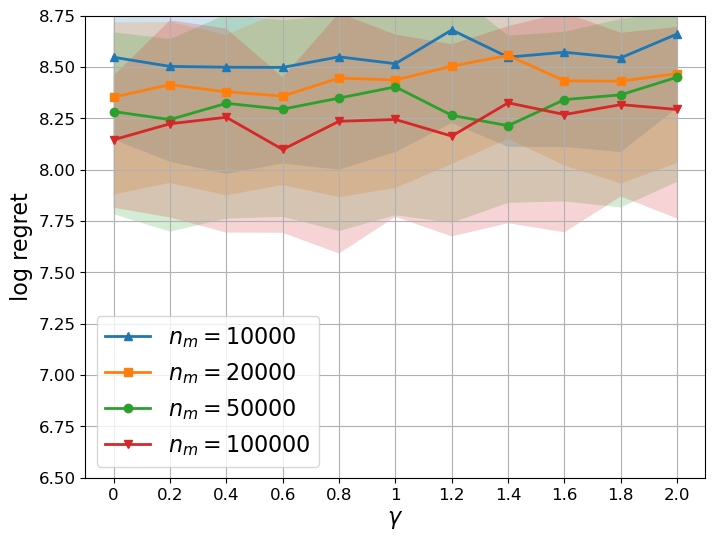

In [122]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5,6,7,8,9,10])


epsilon_m = 2


# idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
# y = best_mean_log['regret'][idx]   
# y = np.log(y)
# _ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")

idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



# _ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(6.5, 8.75)
_ = plt.xticks(x, [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\gamma$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/gamma_{}.pdf".format(epsilon_m),bbox_inches="tight")


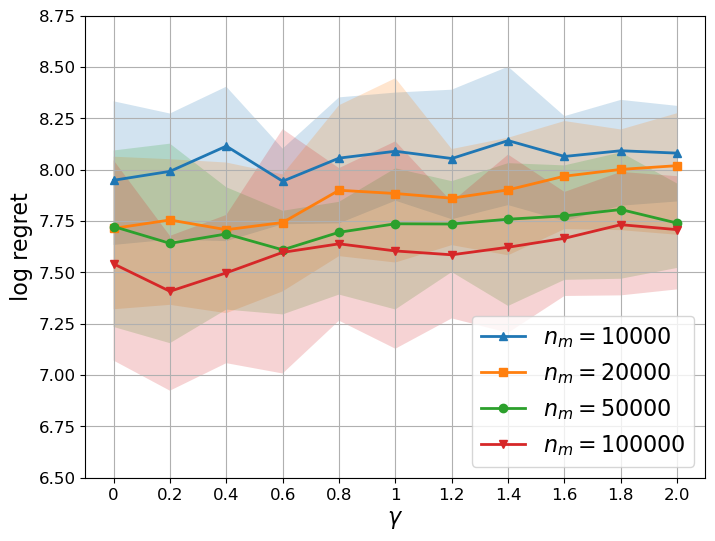

In [123]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5,6,7,8,9,10])


epsilon_m = 4


# idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
# y = best_mean_log['regret'][idx]   
# y = np.log(y)
# _ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")

idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



# _ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(6.5, 8.75)
_ = plt.xticks(x, [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\gamma$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/gamma_{}.pdf".format(epsilon_m),bbox_inches="tight")

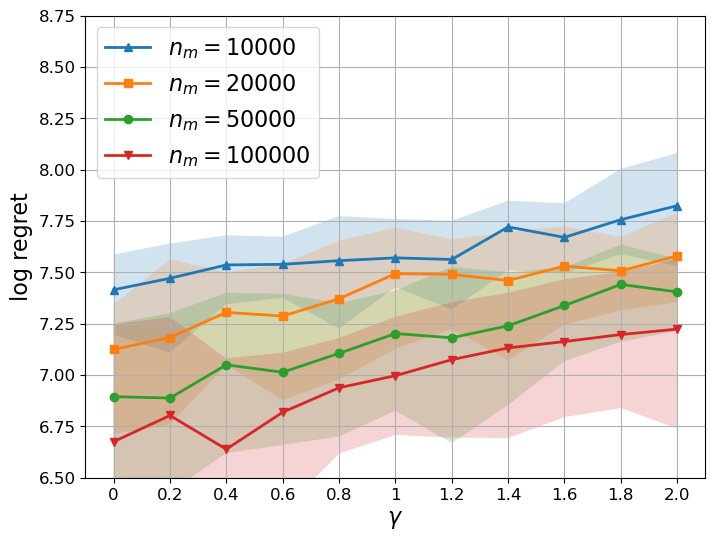

In [124]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5,6,7,8,9,10])


epsilon_m = 8


# idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
# y = best_mean_log['regret'][idx]   
# y = np.log(y)
# _ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")

idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



# _ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(6.5, 8.75)
_ = plt.xticks(x, [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\gamma$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/gamma_{}.pdf".format(epsilon_m),bbox_inches="tight")

In [125]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/gamma" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,epsilon_m,gamma,n,n_m,d,M,K,kappa,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [2],
    "epsilon_m": [ 1, 2, 4, 8 , 1024],
    "gamma": [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0],
    "distribution": ["symmetric"],
    "n": [  40000],
    "n_m": [0, 10000, 20000, 50000, 100000], 
    "K": [2],
    "M": [2],
    "kappa": [0, 0.2, 0.4, 0.6, 0.8, 1],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "kappa", "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log
quantile_up_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 90)).reset_index()
quantile_down_log = filtered_log.groupby(by=["distribution", "epsilon", "epsilon_m", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg(lambda x: np.percentile(x, 10)).reset_index()



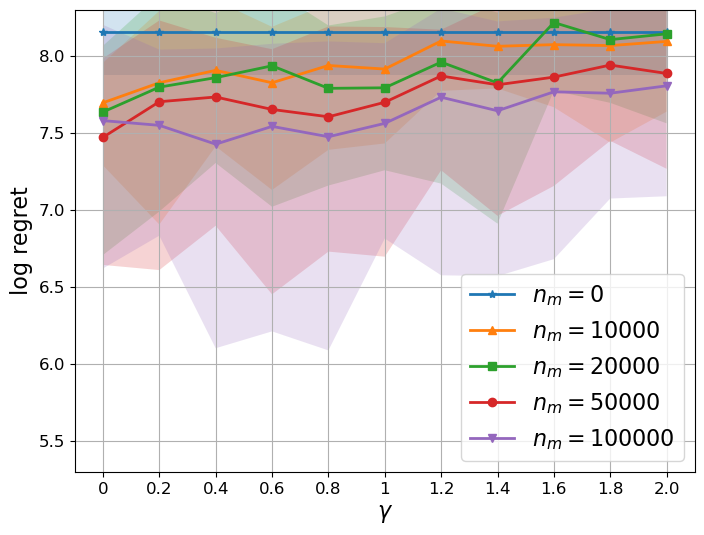

In [126]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5,6,7,8,9,10])


epsilon_m = 2


idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



# _ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(5.3, 8.3)
_ = plt.xticks(x, [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\gamma$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/gamma_{}_symmetric.pdf".format(epsilon_m),bbox_inches="tight")

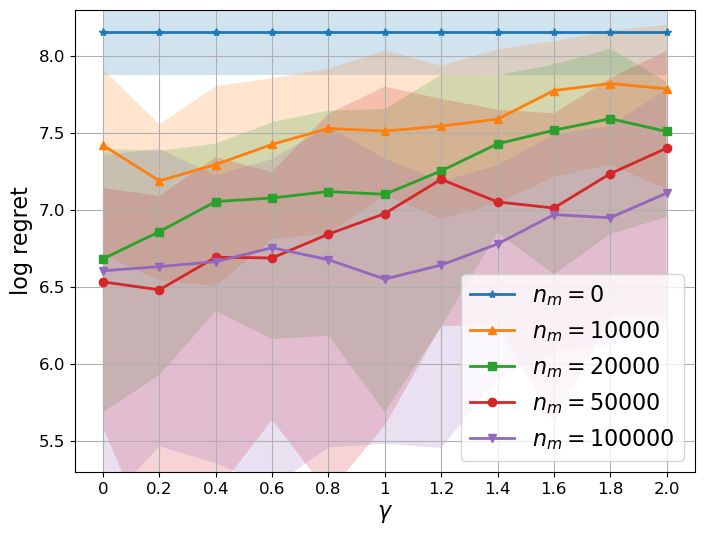

In [127]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5,6,7,8,9,10])


epsilon_m = 4


idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



# _ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(5.3, 8.3)
_ = plt.xticks(x, [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\gamma$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/gamma_{}_symmetric.pdf".format(epsilon_m),bbox_inches="tight")

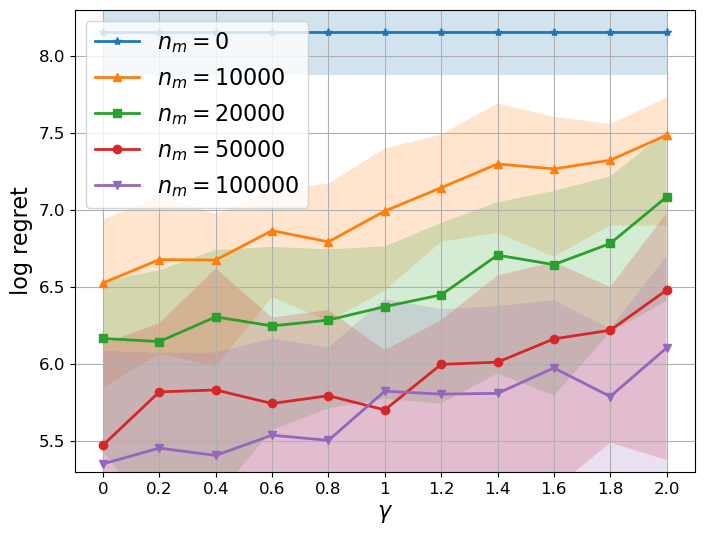

In [128]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3,4,5,6,7,8,9,10])


epsilon_m = 8


idx =   (best_mean_log["n_m"] == 0) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=0$',marker = "*")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 10000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=10000$',marker = "^")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 20000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=20000$',marker = "s")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



idx =   (best_mean_log["n_m"] == 50000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]   
y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=50000$',marker = "o")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)


idx =   (best_mean_log["n_m"] == 100000) & (best_mean_log["epsilon_m"] == epsilon_m)
y = best_mean_log['regret'][idx]  
y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$n_m=100000$',marker = "v")
quantile_up = quantile_up_log['regret'][idx]
quantile_up = np.log(quantile_up)
quantile_down = quantile_down_log['regret'][idx]
quantile_down = np.log(quantile_down)
_ = plt.fill_between(x, quantile_down, quantile_up, alpha = 0.2)



# _ = plt.xlim(-0.1, 5.1)
_ = plt.ylim(5.3, 8.3)
_ = plt.xticks(x, [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.0], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("log regret", fontsize = 16)
_ = plt.xlabel(r"$\gamma$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 16)
_ = plt.savefig("./figures/gamma_{}_symmetric.pdf".format(epsilon_m),bbox_inches="tight")

## Order of Auxiliary

In [157]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/order_of_auxiliary" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,order,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1, 2, 8],
    "order": [ "first_sup", "first_inf"],
    "gamma": [0],
    "distribution": ["exponential"],
    "n": [  80000],
    "n_m": [ 10000, 20000, 50000, 100000], 
    "K": [3],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "order", "gamma", "n", "n_m", "K",  "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log.groupby(by=["distribution", "epsilon", "order", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('max').reset_index()


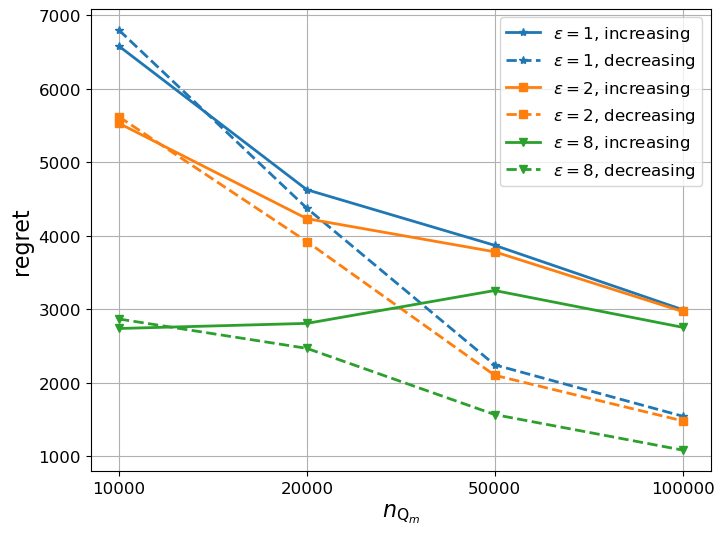

In [158]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3])





idx =   (best_mean_log["epsilon"] == 1) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=1$, increasing',marker = "*", color = "#1f77b4")

idx =   (best_mean_log["epsilon"] == 1) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=1$, decreasing',marker = "*", linestyle = "--", color = "#1f77b4")

idx =   (best_mean_log["epsilon"] == 2) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=2$, increasing',marker = "s", color = "#ff7f0e")


idx =   (best_mean_log["epsilon"] == 2) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=2$, decreasing',marker = "s", linestyle = "--", color = "#ff7f0e")

idx =   (best_mean_log["epsilon"] == 8) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]  
# y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=8$, increasing',marker = "v", color = "#2ca02c")

idx =   (best_mean_log["epsilon"] == 8) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]  
# y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=8$, decreasing',marker = "v", linestyle = "--", color = "#2ca02c")



# _ = plt.xlim(-0.1, 5.1)
# _ = plt.ylim(5.3, 8.3)
_ = plt.xticks(x, [ 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 12)
_ = plt.savefig("./figures/order_80000.pdf".format(gamma),bbox_inches="tight")

In [159]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/order_of_auxiliary" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,order,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1, 2, 8],
    "order": [ "first_sup", "first_inf"],
    "gamma": [0],
    "distribution": ["exponential"],
    "n": [  10000],
    "n_m": [ 10000, 20000, 50000, 100000], 
    "K": [3],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "order", "gamma", "n", "n_m", "K",  "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log.groupby(by=["distribution", "epsilon", "order", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('max').reset_index()


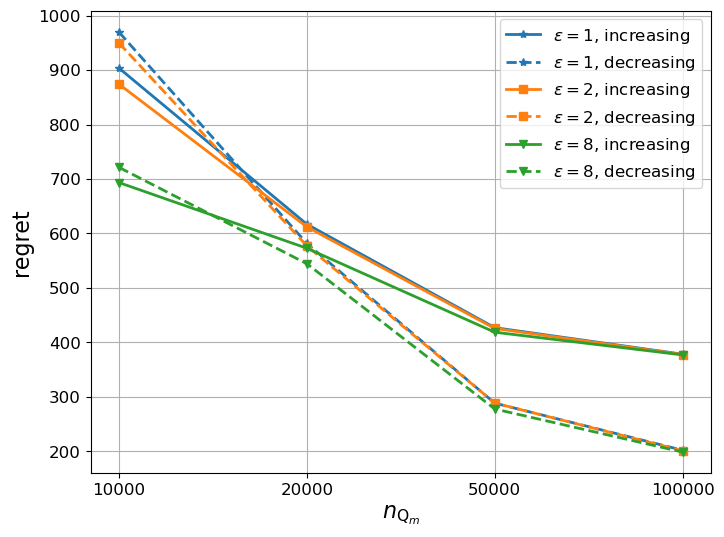

In [160]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3])





idx =   (best_mean_log["epsilon"] == 1) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=1$, increasing',marker = "*", color = "#1f77b4")

idx =   (best_mean_log["epsilon"] == 1) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=1$, decreasing',marker = "*", linestyle = "--", color = "#1f77b4")

idx =   (best_mean_log["epsilon"] == 2) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=2$, increasing',marker = "s", color = "#ff7f0e")


idx =   (best_mean_log["epsilon"] == 2) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=2$, decreasing',marker = "s", linestyle = "--", color = "#ff7f0e")

idx =   (best_mean_log["epsilon"] == 8) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]  
# y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=8$, increasing',marker = "v", color = "#2ca02c")

idx =   (best_mean_log["epsilon"] == 8) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]  
# y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=8$, decreasing',marker = "v", linestyle = "--", color = "#2ca02c")



# _ = plt.xlim(-0.1, 5.1)
# _ = plt.ylim(5.3, 8.3)
_ = plt.xticks(x, [ 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 12)
_ = plt.savefig("./figures/order_10000.pdf".format(gamma),bbox_inches="tight")

In [161]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/order_of_auxiliary" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,order,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1, 2, 8],
    "order": [ "first_sup", "first_inf"],
    "gamma": [0],
    "distribution": ["symmetric"],
    "n": [  80000],
    "n_m": [ 10000, 20000, 50000, 100000], 
    "K": [2],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "order", "gamma", "n", "n_m", "K",  "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log.groupby(by=["distribution", "epsilon", "order", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('max').reset_index()


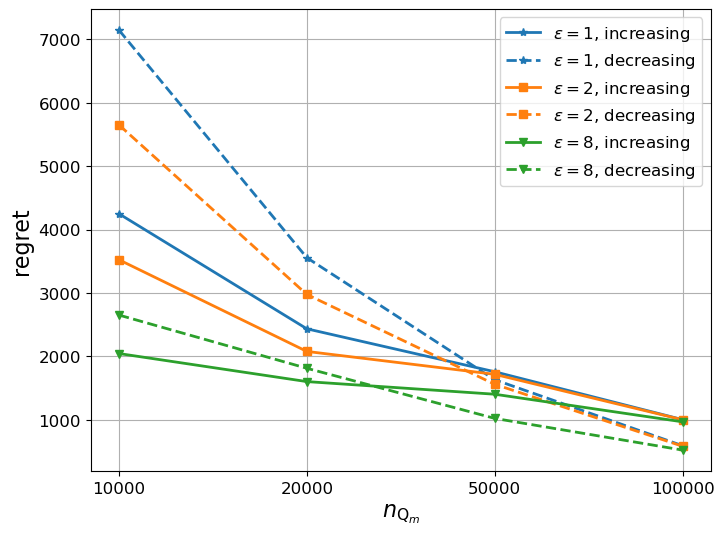

In [162]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3])





idx =   (best_mean_log["epsilon"] == 1) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=1$, increasing',marker = "*", color = "#1f77b4")

idx =   (best_mean_log["epsilon"] == 1) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=1$, decreasing',marker = "*", linestyle = "--", color = "#1f77b4")

idx =   (best_mean_log["epsilon"] == 2) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=2$, increasing',marker = "s", color = "#ff7f0e")


idx =   (best_mean_log["epsilon"] == 2) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=2$, decreasing',marker = "s", linestyle = "--", color = "#ff7f0e")

idx =   (best_mean_log["epsilon"] == 8) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]  
# y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=8$, increasing',marker = "v", color = "#2ca02c")

idx =   (best_mean_log["epsilon"] == 8) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]  
# y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=8$, decreasing',marker = "v", linestyle = "--", color = "#2ca02c")



# _ = plt.xlim(-0.1, 5.1)
# _ = plt.ylim(5.3, 8.3)
_ = plt.xticks(x, [ 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 12)
_ = plt.savefig("./figures/order_80000_symmetric.pdf".format(gamma),bbox_inches="tight")

In [163]:
report_method = ["LDPMAB"]
all_log = pd.DataFrame([])
log_file_dir = "./logs/order_of_auxiliary" 

for method in report_method:
    log = pd.read_csv("{}/{}.csv".format(log_file_dir,method), header=None)
    log.columns = "distribution,iterate,epsilon,order,gamma,n,n_m,d,M,K,if_weighted,time,test_point_arm_ratio,regret,test_regret".split(',')
    all_log = pd.concat([all_log, log])
    
values_to_filter = {
    "epsilon": [1, 2, 8],
    "order": [ "first_sup", "first_inf"],
    "gamma": [0],
    "distribution": ["symmetric"],
    "n": [  10000],
    "n_m": [ 10000, 20000, 50000, 100000], 
    "K": [2],
    "M": [2],
    "if_weighted": [True]
}
mask_list = [all_log[col].isin(values) for col, values in values_to_filter.items()]
combined_mask = mask_list[0]
for mask in mask_list[1:]:
    combined_mask = combined_mask & mask
filtered_log = all_log[combined_mask]


mean_log = filtered_log.groupby(by=["distribution", "epsilon", "order", "gamma", "n", "n_m", "K",  "M", "if_weighted"]).agg('mean').reset_index()
best_mean_log = mean_log.groupby(by=["distribution", "epsilon", "order", "gamma", "n", "n_m", "K", "M", "if_weighted"]).agg('max').reset_index()


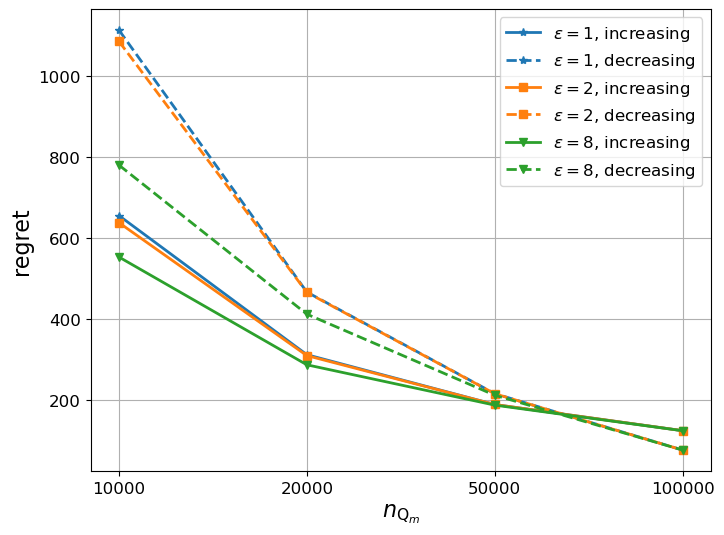

In [164]:
fig, ax = plt.subplots(figsize=(8,6))
# x = best_mean_log["n_m"].unique()
# x.sort()
x = np.array([0,1,2,3])





idx =   (best_mean_log["epsilon"] == 1) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=1$, increasing',marker = "*", color = "#1f77b4")

idx =   (best_mean_log["epsilon"] == 1) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=1$, decreasing',marker = "*", linestyle = "--", color = "#1f77b4")

idx =   (best_mean_log["epsilon"] == 2) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=2$, increasing',marker = "s", color = "#ff7f0e")


idx =   (best_mean_log["epsilon"] == 2) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]   
# y = np.log(y)
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=2$, decreasing',marker = "s", linestyle = "--", color = "#ff7f0e")

idx =   (best_mean_log["epsilon"] == 8) & (best_mean_log["order"] == "first_inf")
y = best_mean_log['regret'][idx]  
# y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=8$, increasing',marker = "v", color = "#2ca02c")

idx =   (best_mean_log["epsilon"] == 8) & (best_mean_log["order"] == "first_sup")
y = best_mean_log['regret'][idx]  
# y = np.log(y) 
_ = plt.plot(x,y,linewidth=2,label=r'$\epsilon=8$, decreasing',marker = "v", linestyle = "--", color = "#2ca02c")



# _ = plt.xlim(-0.1, 5.1)
# _ = plt.ylim(5.3, 8.3)
_ = plt.xticks(x, [ 10000, 20000, 50000, 100000], fontsize = 12)
_ = plt.yticks(fontsize = 12)
_ = plt.ylabel("regret", fontsize = 16)
_ = plt.xlabel(r"$n_{\mathrm{Q}_m}$", fontsize = 16)
_ = plt.grid()

_ = plt.legend(fontsize = 12)
_ = plt.savefig("./figures/order_10000_symmetric.pdf".format(gamma),bbox_inches="tight")

## Visualization

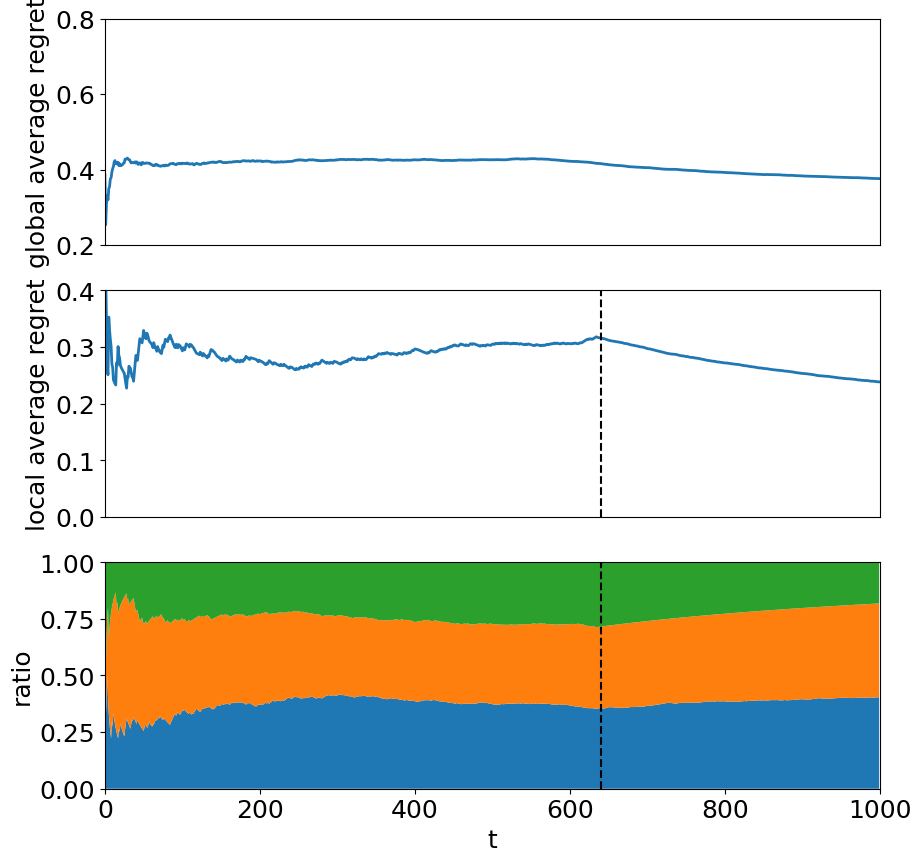

In [ ]:
iterate, epsilon, epsilon_m, gamma, n, n_m, d, M, K, if_weighted = 0, 1, 2, 0, 10000, 0, 2, 1, 3, False
filename = "{}-{}-{}-{}-{}-{}-{}-{}-{}-{}-{}\n".format("exponential", iterate, epsilon, epsilon_m, gamma, n, n_m, d, M, K, if_weighted)
regret_npy_path = "./logs/visualization_process/regret_vec{}.npy".format(filename) 
regret_vec = np.load(regret_npy_path)
test_point_policies_path = "./logs/visualization_process/test_point_policies{}.npy".format(filename)
test_point_policies = np.load(test_point_policies_path)
test_point_regret_path = "./logs/visualization_process/test_point_regret{}.npy".format(filename)
test_point_regret = np.load(test_point_regret_path)

cut_point = 1000

average_regret = [np.mean(regret_vec[:i])/ 10  for i in range(1, cut_point + 1)]
average_test_point_regret = [np.mean(test_point_regret[:i])  for i in range(1, cut_point + 1)]

average_arm_ratio = [[np.mean(test_point_policies[:i] == j) for i in range(1, cut_point + 1)] for j in range(K)]


fig, axs = plt.subplots(3, 1, figsize=(10,10))
_ = axs[0].plot([i for i in range(len(average_regret))], average_regret, linewidth=2)
_ = axs[1].plot([i for i in range(len(average_regret))], average_test_point_regret, linewidth=2)
_ = axs[2].stackplot([i for i in range(len(average_regret))], average_arm_ratio, labels = ["arm {}".format(i) for i in range(K)])

_ = axs[0].set_xlim(0, len(average_arm_ratio[0]))
_ = axs[0].set_ylim(0.2, 0.8)
_ = axs[1].set_xlim(0, len(average_arm_ratio[0]))
_ = axs[1].set_ylim(0, 0.4)
_ = axs[2].set_xlim(0, len(average_arm_ratio[0]))
_ = axs[2].set_ylim(0, 1)




_ = axs[1].vlines(640, 0, 0.4, colors = "black", linestyles = "dashed")
_ = axs[2].vlines(640, 0, 1, colors = "black", linestyles = "dashed")

# no ticks for the first two plots
_ = axs[0].set_xticks([])
_ = axs[1].set_xticks([])
_ = axs[2].set_xticks([0, 200, 400, 600, 800, 1000])
# font size of ticks
_ = axs[0].tick_params(labelsize=18)
_ = axs[1].tick_params(labelsize=18)
_ = axs[2].tick_params(labelsize=18)
_ = axs[0].set_ylabel("global average regret", fontsize = 18)
_ = axs[1].set_ylabel("local average regret", fontsize = 18)
_ = axs[2].set_xlabel("t", fontsize = 18)
_ = axs[2].set_ylabel("ratio", fontsize = 18)



_ = plt.savefig("./figures/bandit_process_1.pdf",bbox_inches="tight")


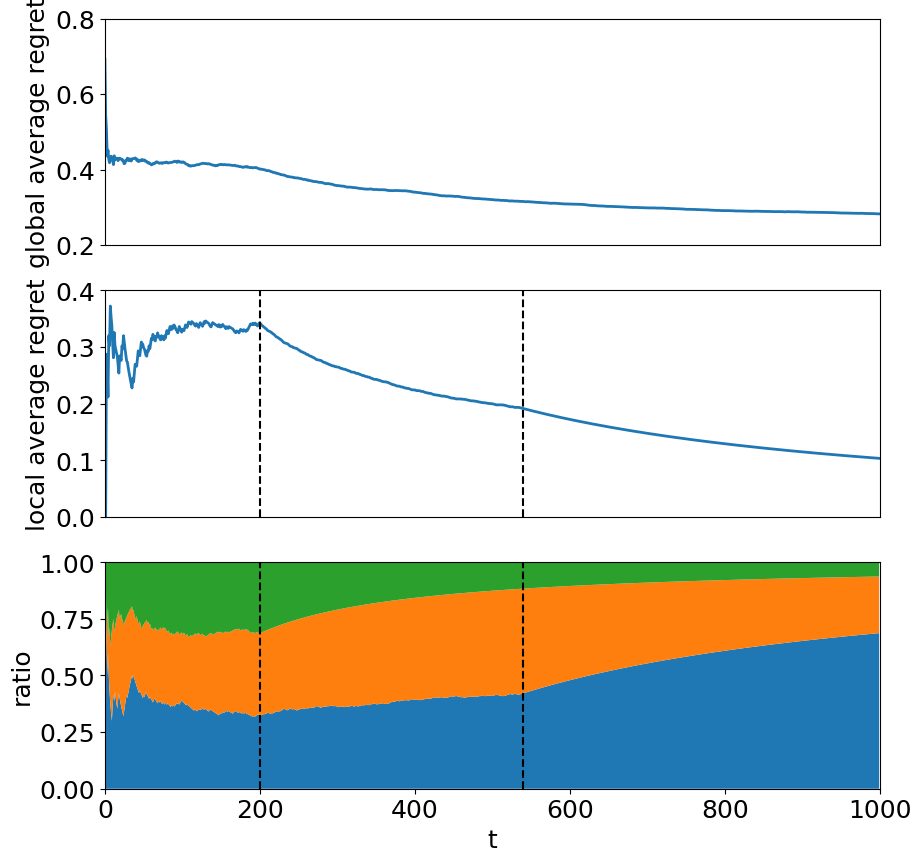

In [ ]:
iterate, epsilon, epsilon_m, gamma, n, n_m, d, M, K, if_weighted = 0, 1, 8, 0, 10000, 500, 2, 1, 3, False
filename = "{}-{}-{}-{}-{}-{}-{}-{}-{}-{}-{}\n".format("exponential", iterate, epsilon, epsilon_m, gamma, n, n_m, d, M, K, if_weighted)
regret_npy_path = "./logs/visualization_process/regret_vec{}.npy".format(filename) 
regret_vec = np.load(regret_npy_path)
test_point_policies_path = "./logs/visualization_process/test_point_policies{}.npy".format(filename)
test_point_policies = np.load(test_point_policies_path)
test_point_regret_path = "./logs/visualization_process/test_point_regret{}.npy".format(filename)
test_point_regret = np.load(test_point_regret_path)

cut_point = 1000

average_regret = [np.mean(regret_vec[:i]) / 10 for i in range(1, cut_point + 1)]
average_test_point_regret = [np.mean(test_point_regret[:i]) for i in range(1, cut_point + 1)]

average_arm_ratio = [[np.mean(test_point_policies[:i] == j) for i in range(1, cut_point + 1)] for j in range(K)]


fig, axs = plt.subplots(3, 1, figsize=(10,10))
_ = axs[0].plot([i for i in range(len(average_regret))], average_regret, linewidth=2)
_ = axs[1].plot([i for i in range(len(average_regret))], average_test_point_regret, linewidth=2)
_ = axs[2].stackplot([i for i in range(len(average_regret))], average_arm_ratio, labels = ["arm {}".format(i) for i in range(K)])

_ = axs[0].set_xlim(0, len(average_arm_ratio[0]))
_ = axs[0].set_ylim(0.2, 0.8)
_ = axs[1].set_xlim(0, len(average_arm_ratio[0]))
_ = axs[1].set_ylim(0, 0.4)
_ = axs[2].set_xlim(0, len(average_arm_ratio[0]))
_ = axs[2].set_ylim(0, 1)

_ = axs[1].vlines(200, 0, 0.4, colors = "black", linestyles = "dashed")
_ = axs[2].vlines(200, 0, 1, colors = "black", linestyles = "dashed")

_ = axs[1].vlines(540, 0, 0.4, colors = "black", linestyles = "dashed")
_ = axs[2].vlines(540, 0, 1, colors = "black", linestyles = "dashed")


# no ticks for the first two plots
_ = axs[0].set_xticks([])
_ = axs[1].set_xticks([])
_ = axs[2].set_xticks([0, 200, 400, 600, 800, 1000])

# font size of ticks
_ = axs[0].tick_params(labelsize=18)
_ = axs[1].tick_params(labelsize=18)
_ = axs[2].tick_params(labelsize=18)
_ = axs[0].set_ylabel("global average regret", fontsize = 18)
_ = axs[1].set_ylabel("local average regret", fontsize = 18)
_ = axs[2].set_xlabel("t", fontsize = 18)
_ = axs[2].set_ylabel("ratio", fontsize = 18)


_ = plt.savefig("./figures/bandit_process_2.pdf",bbox_inches="tight")


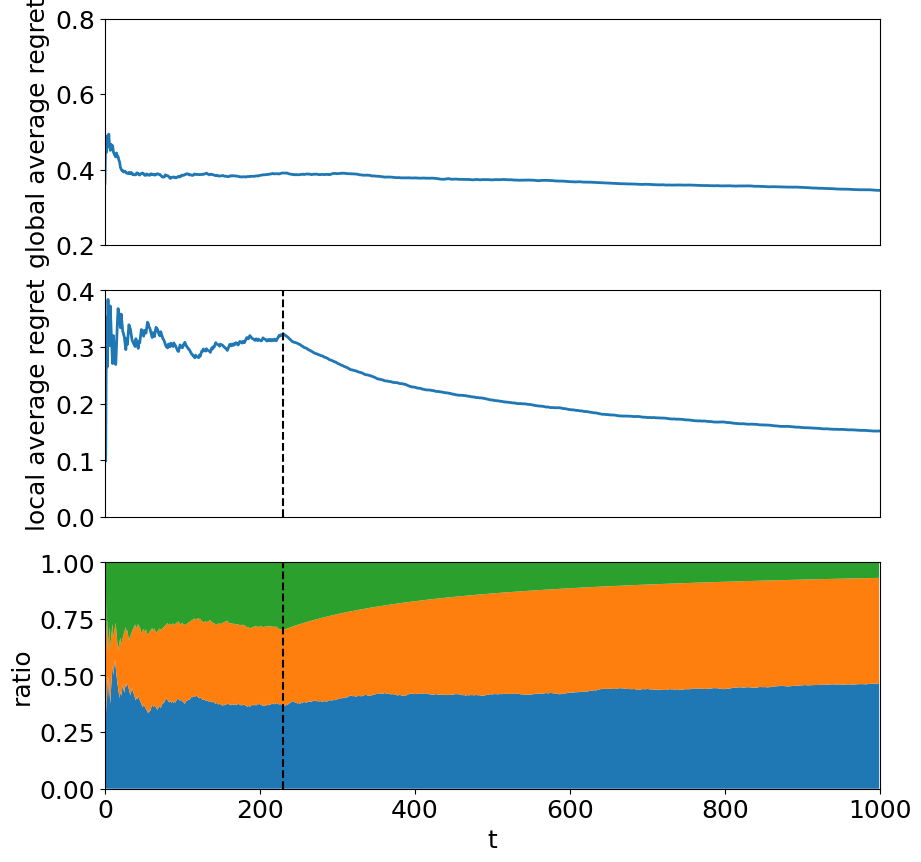

In [9]:
iterate, epsilon, epsilon_m, gamma, n, n_m, d, M, K, if_weighted = 0, 1, 0.5, 5, 10000, 500, 2, 1, 3, False
filename = "{}-{}-{}-{}-{}-{}-{}-{}-{}-{}-{}\n".format("exponential", iterate, epsilon, epsilon_m, gamma, n, n_m, d, M, K, if_weighted)
regret_npy_path = "./logs/visualization_process/regret_vec{}.npy".format(filename) 
regret_vec = np.load(regret_npy_path)
test_point_policies_path = "./logs/visualization_process/test_point_policies{}.npy".format(filename)
test_point_policies = np.load(test_point_policies_path)
test_point_regret_path = "./logs/visualization_process/test_point_regret{}.npy".format(filename)
test_point_regret = np.load(test_point_regret_path)

cut_point = 1000

average_regret = [np.mean(regret_vec[:i]) / 10 for i in range(1, cut_point + 1)]
average_test_point_regret = [np.mean(test_point_regret[:i]) for i in range(1, cut_point + 1)]

average_arm_ratio = [[np.mean(test_point_policies[:i] == j) for i in range(1, cut_point + 1)] for j in range(K)]


fig, axs = plt.subplots(3, 1, figsize=(10,10))
_ = axs[0].plot([i for i in range(len(average_regret))], average_regret, linewidth=2)
_ = axs[1].plot([i for i in range(len(average_regret))], average_test_point_regret, linewidth=2)
_ = axs[2].stackplot([i for i in range(len(average_regret))], average_arm_ratio, labels = ["arm {}".format(i) for i in range(K)])

_ = axs[0].set_xlim(0, len(average_arm_ratio[0]))
_ = axs[0].set_ylim(0.2, 0.8)
_ = axs[1].set_xlim(0, len(average_arm_ratio[0]))
_ = axs[1].set_ylim(0, 0.4)
_ = axs[2].set_xlim(0, len(average_arm_ratio[0]))
_ = axs[2].set_ylim(0, 1)

_ = axs[1].vlines(230, 0, 0.4, colors = "black", linestyles = "dashed")
_ = axs[2].vlines(230, 0, 1, colors = "black", linestyles = "dashed")


# no ticks for the first two plots
_ = axs[0].set_xticks([])
_ = axs[1].set_xticks([])
_ = axs[2].set_xticks([0, 200, 400, 600, 800, 1000])

# font size of ticks
_ = axs[0].tick_params(labelsize=18)
_ = axs[1].tick_params(labelsize=18)
_ = axs[2].tick_params(labelsize=18)
_ = axs[0].set_ylabel("global average regret", fontsize = 18)
_ = axs[1].set_ylabel("local average regret", fontsize = 18)
_ = axs[2].set_xlabel("t", fontsize = 18)
_ = axs[2].set_ylabel("ratio", fontsize = 18)




_ = plt.savefig("./figures/bandit_process_3.pdf",bbox_inches="tight")
